Самый частый способ оценки футболистов - это система очков гол + пас.

In [ ]:
pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Таблица "Гол + пас"
tables = pd.read_html('https://metaratings.ru/chempionat-mira-po-futbolu-fifa/statistika-igrokov/')
tables[3]

,Игрок,Сборная,Гол,Пас,Очки
0,Килиан Мбаппе,Франция,8,2,10
1,Лионель Месси,Аргентина,7,3,10
2,Бруну Фернандеш,Португалия,2,3,5
3,Харри Кейн,Англия,2,3,5
4,Оливье Жиру,Франция,4,0,4
5,Хулиан Альварес,Аргентина,4,0,4
6,Гонсалу Рамуш,Португалия,3,1,4
7,Альваро Мората,Испания,3,1,4
8,...,...,...,...,...
9,Криштиану Роналду,Португалия,1,0,1


Конечно, в большинстве случаев этого достаточно. 

Однако, иногда требуется более глубокий разбор показателей игроков.

Далее будет представлена система выявления лучших игроков чемпионата на основе
общего рейтинга, выведенного из многого числа показателей.

#Рейтиноговая таблица игроков по итогам FIFA WC 2022

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

In [2]:
# чтение файла. Замена прочерков "-" на NaN

df_players = pd.read_csv('FIFA WC 2022 Players Stats.csv', na_values = '-')
df_players.head()

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Save Percentage,Clean Sheets,Brand Sponsor/Brand Used
0,Argentina,2,Adidas,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65,46.67%,43%,Adidas
1,Argentina,2,Adidas,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nike
2,Argentina,2,Adidas,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adidas
3,Argentina,2,Adidas,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17,NaN,NaN,Nike
4,Argentina,2,Adidas,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97,NaN,NaN,Nike


In [3]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  814 non-null    object 
 1   FIFA Ranking                 814 non-null    int64  
 2   National Team Kit Sponsor    813 non-null    object 
 3   Position                     814 non-null    object 
 4   National Team Jersey Number  813 non-null    float64
 5   Player DOB                   814 non-null    object 
 6   Club                         812 non-null    object 
 7   Player Name                  814 non-null    object 
 8    Appearances                 807 non-null    object 
 9   Goals Scored                 732 non-null    object 
 10  Assists Provided             732 non-null    object 
 11  Dribbles per 90              732 non-null    object 
 12  Interceptions per 90         732 non-null    object 
 13  Tackles per 90      

In [4]:
# кол-во пропущенных значений
df_players.isna().sum()

Nationality                      0
FIFA Ranking                     0
National Team Kit Sponsor        1
Position                         0
National Team Jersey Number      1
Player DOB                       0
Club                             2
Player Name                      0
 Appearances                     7
Goals Scored                    82
Assists Provided                82
Dribbles per 90                 82
Interceptions per 90            82
Tackles per 90                  82
Total Duels Won per 90          78
Save Percentage                763
Clean Sheets                   763
Brand Sponsor/Brand Used         1
dtype: int64

##Очистка и преобразование данных

In [5]:
df_players_clean = df_players.copy()

In [6]:
df_players_clean.columns

Index(['Nationality ', 'FIFA Ranking ', 'National Team Kit Sponsor',
       'Position', 'National Team Jersey Number', 'Player DOB', 'Club ',
       'Player Name ', ' Appearances', 'Goals Scored ', 'Assists Provided ',
       'Dribbles per 90', 'Interceptions per 90', 'Tackles per 90',
       'Total Duels Won per 90', 'Save Percentage', 'Clean Sheets',
       'Brand Sponsor/Brand Used'],
      dtype='object')

In [7]:
# Уберем пробелы в начале и в конце имен столбцов
df_players_clean.columns = df_players_clean.columns.str.strip()

In [8]:
# Уберем пробелы в начале и в конце значений стобца 'Nationality' 
df_players_clean['Nationality'] = df_players_clean['Nationality'].str.strip()


In [9]:
df_players_clean.columns

Index(['Nationality', 'FIFA Ranking', 'National Team Kit Sponsor', 'Position',
       'National Team Jersey Number', 'Player DOB', 'Club', 'Player Name',
       'Appearances', 'Goals Scored', 'Assists Provided', 'Dribbles per 90',
       'Interceptions per 90', 'Tackles per 90', 'Total Duels Won per 90',
       'Save Percentage', 'Clean Sheets', 'Brand Sponsor/Brand Used'],
      dtype='object')

In [10]:
# Удалим столбцы "Save Percentage" и "Clean Sheets" т.к. большинство значений в них NaN

df_players_clean.drop(['Save Percentage', 'Clean Sheets'], axis = 1, inplace = True)
df_players_clean.head()

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Brand Sponsor/Brand Used
0,Argentina,2,Adidas,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65,Adidas
1,Argentina,2,Adidas,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,NaN,NaN,NaN,NaN,NaN,NaN,Nike
2,Argentina,2,Adidas,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,NaN,NaN,NaN,NaN,NaN,NaN,Adidas
3,Argentina,2,Adidas,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17,Nike
4,Argentina,2,Adidas,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97,Nike


In [11]:
# Удалим игроков, по которым нет статистики. Вероятно, они не выступали на чемпионате.
# Столбцы Appearances, Goals Scored, Assists Provided, Dribbles per 90 
# Interceptions per 90, Tackles per 90, Total Duels Won per 90 

df_players_clean.dropna(subset=['Appearances'], inplace = True)

df_players_clean[df_players_clean['Position'] != 'GK'].dropna(subset=['Appearances', 
                        'Goals Scored', 'Assists Provided',
                        'Dribbles per 90', 'Interceptions per 90',
                        'Tackles per 90', 'Total Duels Won per 90'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
df_players_clean.isna().sum()

Nationality                     0
FIFA Ranking                    0
National Team Kit Sponsor       1
Position                        0
National Team Jersey Number     1
Player DOB                      0
Club                            2
Player Name                     0
Appearances                     0
Goals Scored                   75
Assists Provided               75
Dribbles per 90                75
Interceptions per 90           75
Tackles per 90                 75
Total Duels Won per 90         71
Brand Sponsor/Brand Used        1
dtype: int64

In [13]:
# Выведем оставшиеся строки с пустыми значениями
df_players_clean[df_players_clean.isnull().any(1)]

,Nationality,FIFA Ranking,National Team Kit Sponsor,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,Brand Sponsor/Brand Used
1,Argentina,2,Adidas,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,NaN,NaN,NaN,NaN,NaN,NaN,Nike
2,Argentina,2,Adidas,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,NaN,NaN,NaN,NaN,NaN,NaN,Adidas
26,France,3,Nike,GK,1.0,"Dec 26, 1986",Tottenham,Hugo Lloris,6,NaN,NaN,NaN,NaN,NaN,1.10,Nike
28,France,3,Nike,GK,16.0,"Mar 28, 1985",Rennes,Steve Mandanda,1,NaN,NaN,NaN,NaN,NaN,0.00,Puma
51,Croatia,7,Nike,GK,1.0,"Jan 9, 1995",Dinamo Zagreb,Dominik Livakovic,7,NaN,NaN,NaN,NaN,NaN,0.26,Adidas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,Ghana,58,Puma,GK,12.0,"Dec 2, 2002",Asante Kotoko,Danlad Ibrahim,0,NaN,NaN,NaN,NaN,NaN,NaN,Nike
738,Ghana,58,Puma,GK,1.0,"Nov 29, 1996",St. Gellen,Lawrence Ati Zigi,3,NaN,NaN,NaN,NaN,NaN,NaN,Adidas
788,Canada,53,Nike,GK,16.0,"Feb 21, 1997",CF Montreal,James Paternis,0,NaN,NaN,NaN,NaN,NaN,NaN,Adidas
789,Canada,53,Nike,GK,18.0,"Oct 23, 1987",Red Star Belgrade,Milan Borjan,3,NaN,NaN,NaN,NaN,NaN,NaN,Nike


In [14]:
df_players_clean[df_players_clean['Position'] == 'GK'] = df_players_clean[df_players_clean['Position'] == 'GK'].fillna(0)

In [15]:
#Удалим столбцы о национальном и личном спонсорах, они не влияют на статистику

df_players_clean.drop(['National Team Kit Sponsor', 'Brand Sponsor/Brand Used'], axis = 1, inplace = True)
df_players_clean.head()

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
0,Argentina,2,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65
1,Argentina,2,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,0,0,0,0,0,0
2,Argentina,2,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,0,0,0,0,0,0
3,Argentina,2,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17
4,Argentina,2,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97


In [16]:
df_players_clean.isna().sum()

Nationality                    0
FIFA Ranking                   0
Position                       0
National Team Jersey Number    1
Player DOB                     0
Club                           2
Player Name                    0
Appearances                    0
Goals Scored                   1
Assists Provided               1
Dribbles per 90                1
Interceptions per 90           1
Tackles per 90                 1
Total Duels Won per 90         1
dtype: int64

In [17]:
# Выведем оставшиеся строки с пустыми значениями
df_players_clean[df_players_clean.isnull().any(1)]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
201,Portugal,9,FW,7.0,"February 5, 1985",NaN,Cristiano Ronaldo 🐐,5,1,0,0.62,0.00,0.00,6.49
441,Qatar,60,DF,NaN,"Dec 16, 1997",Al-Duhail,Bassam Al-Rawi,1,0,0,0.00,0.00,0.00,4.00
446,Qatar,60,MF,20.0,"Apr 10, 1996",NaN,Salem Al-Hajri,N.A,N.A,N.A,N.A,N.A,N.A,N.A
714,Serbia,29,DF,13.0,"May 22, 1990",Getafe,Stefan Mitrovic,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Криштиану Роналду на момент чемпионата действительно не состоял ни в одном клубе
# заменим его значение на "Free player"
df_players_clean['Club'] = np.where((df_players_clean['Player Name'] == 'Cristiano Ronaldo 🐐'), 'Free player', df_players_clean['Club'])

In [19]:
# Оставшиеся игроки не повлияют на статистику, исходя из значений
# Удалим оставшиеся строки с NaN

df_players_clean = df_players_clean.dropna()

In [20]:
df_players_clean.isna().sum()

Nationality                    0
FIFA Ranking                   0
Position                       0
National Team Jersey Number    0
Player DOB                     0
Club                           0
Player Name                    0
Appearances                    0
Goals Scored                   0
Assists Provided               0
Dribbles per 90                0
Interceptions per 90           0
Tackles per 90                 0
Total Duels Won per 90         0
dtype: int64

In [21]:
df_players_clean

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
0,Argentina,2,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65
1,Argentina,2,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,0,0,0,0,0,0
2,Argentina,2,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,0,0,0,0,0,0
3,Argentina,2,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17
4,Argentina,2,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Canada,53,FW,17.0,"Apr 17, 1995",Club Brugge,Cyle Larin,3,0,0,1.33,0.00,0.00,1.95
810,Canada,53,FW,19.0,"Nov 2, 2000",Bayern Munich,Alphonso Davies,3,1,0,6.00,1.00,0.67,6.67
811,Canada,53,FW,20.0,"Jan 14, 2000",Lille,Jonathan David,3,0,0,1.41,0.00,0.47,1.88
812,Canada,53,FW,23.0,"Sep 27, 1999",Basel,Liam Millar,1,0,0,0.00,0.00,0.00,0.00


In [22]:
# По данным видно, что есть игроки, у которых в столбцах характеристик "N.A"
# Найдем строки, у которых "N.A" в столбце "Appearances" - эти игроки не выступали
# на чемпионате, следовательно, нет информации о их статистике

df_players_clean[df_players_clean['Appearances'].str.contains('N.A')]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
54,Croatia,7,DF,21.0,"Apr 29, 1989",AEK Athens,Domagoj Vida,N.A,N.A,N.A,N.A,N.A,N.A,N.A
61,Croatia,7,DF,5.0,"Jan 24, 1998",Sassuolo,Martin Erlic,N.A,N.A,N.A,N.A,N.A,N.A,N.A
70,Croatia,7,MF,25.0,"Sep 8, 2002",Red Bull Salzburg,Luka Sucic,N.A,N.A,N.A,N.A,N.A,N.A,N.A
107,Netherlands,6,DF,6.0,"Feb 5, 1992",Inter,Stefan de Vrij,N.A,N.A,N.A,N.A,N.A,N.A,N.A
113,Netherlands,6,DF,16.0,"Jun 17, 1999",Manchester United,Tyrell Malacia,N.A,N.A,N.A,N.A,N.A,N.A,N.A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Canada,53,DF,26.0,"Jan 24, 1996",Montreal Impact,Joel Waterman,N.A,N.A,N.A,N.A,N.A,N.A,N.A
798,Canada,53,MF,6.0,"Nov 12, 1994",Montreal Impact,Samuel Piette,N.A,N.A,N.A,N.A,N.A,N.A,N.A
802,Canada,53,MF,21.0,"Jun 12, 1992",Toronto,Jonathan Osorio,N.A,N.A,N.A,N.A,N.A,N.A,N.A
804,Canada,53,MF,8.0,"Feb 13, 1998",KMSK Deinze,Liam Fraser,N.A,N.A,N.A,N.A,N.A,N.A,N.A


In [23]:
# Удалим строки у которых "N.A" в столбце "Appearances"
df_players_clean = df_players_clean[~df_players_clean['Appearances'].str.contains('N.A')]
df_players_clean

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
0,Argentina,2,GK,23.0,"Sep 2, 1992",Aston Villa,Emiliano Martinez,7,0,0,0.00,0.00,0.00,0.65
1,Argentina,2,GK,1.0,"Oct 16, 1986",River,Franco Armani,0,0,0,0,0,0,0
2,Argentina,2,GK,12.0,"May 20, 1992",Villarreal,Geronimo Rulli,0,0,0,0,0,0,0
3,Argentina,2,DF,19.0,"Feb 12, 1988",Benfica,Nicolas Otamendi,7,0,1,0.33,1.17,1.30,7.17
4,Argentina,2,DF,8.0,"Oct 28, 1991",Sevilla,Marcos Acuna,6,0,0,1.45,0.48,2.90,7.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Canada,53,FW,11.0,"Feb 8, 1999",Club Brugge,Tajon Buchanan,3,0,1,6.21,1.03,0.34,5.17
809,Canada,53,FW,17.0,"Apr 17, 1995",Club Brugge,Cyle Larin,3,0,0,1.33,0.00,0.00,1.95
810,Canada,53,FW,19.0,"Nov 2, 2000",Bayern Munich,Alphonso Davies,3,1,0,6.00,1.00,0.67,6.67
811,Canada,53,FW,20.0,"Jan 14, 2000",Lille,Jonathan David,3,0,0,1.41,0.00,0.47,1.88


In [24]:
# Также удалим строки с "Appearances" = 0
df_players_clean = df_players_clean[~df_players_clean['Appearances'].str.contains('0')]

In [25]:
# Посмотрим строки, у которых "N.A" в оставшихся характеристиках
df_players_clean[df_players_clean.isin(['N.A']).any(axis = 1)]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Player DOB,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
9,Argentina,2,DF,2.0,"Jan 12, 1998",Villarreal,Juan Foyth,1,0,0,N.A,0.00,0.00,N.A
21,Argentina,2,FW,21.0,"Nov 15, 1993",Roma,Paulo Dybala,2,0,0,5.62,0.00,N.A,N.A
25,Argentina,2,FW,15.0,"March 9, 1995",Atletico Madrid,Angel Correa,1,0,0,0.00,0.00,N.A,N.A
69,Croatia,7,MF,26.0,"May 14, 1997",Eintracht Frankfurt,Kristijan Jakic,1,N.A,N.A,N.A,N.A,N.A,N.A
75,Croatia,7,FW,17.0,"Jul 22, 1991",Osasuna,Ante Budimir,2,0,0,0.00,0.00,1.67,N.A
97,Morocco,11,FW,10.0,"Nov 7, 2000",Burnley,Anass Zaroury,1,0,0,N.A,N.A,N.A,N.A
98,Morocco,11,FW,16.0,"Dec 17, 2001",Osasuna,Abde Ezzalzouli,3,0,0,N.A,N.A,N.A,N.A
102,Morocco,11,FW,9.0,"Dec 17, 1990",Al-Ittihad,Abderrazak Hamdallah,4,0,0,4.22,0.00,1.41,N.A
112,Netherlands,6,DF,2.0,"Jun 17, 2001",Ajax,Jurrien Timber,4,0,0,N.A,N.A,N.A,N.A
120,Netherlands,6,MF,25.0,"Apr 21, 2003",PSV,Xavi Simons,1,0,0,0.00,12.86,0.00,N.A


In [26]:
# Заменим "N.A" на 0
df_players_clean.replace('N.A', 0.00, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [27]:
# Проверим соответствие типов данных
df_players_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  619 non-null    object 
 1   FIFA Ranking                 619 non-null    int64  
 2   Position                     619 non-null    object 
 3   National Team Jersey Number  619 non-null    float64
 4   Player DOB                   619 non-null    object 
 5   Club                         619 non-null    object 
 6   Player Name                  619 non-null    object 
 7   Appearances                  619 non-null    object 
 8   Goals Scored                 619 non-null    object 
 9   Assists Provided             619 non-null    object 
 10  Dribbles per 90              619 non-null    object 
 11  Interceptions per 90         619 non-null    object 
 12  Tackles per 90               619 non-null    object 
 13  Total Duels Won per 

In [28]:
# Заменим тип данных у №7 - int64, №8-13 на float 64
df_players_clean['Appearances'] = df_players_clean['Appearances'].astype(int)
df_players_clean['National Team Jersey Number'] = df_players_clean['National Team Jersey Number'].astype(int)
df_players_clean[['Goals Scored', 'Assists Provided',
                  'Dribbles per 90', 'Interceptions per 90',
                  'Tackles per 90', 
                  'Total Duels Won per 90']] = df_players_clean[['Goals Scored',
                                                                'Assists Provided',
                                                                'Dribbles per 90', 
                                                                'Interceptions per 90',
                                                                'Tackles per 90', 
                                                                'Total Duels Won per 90']].astype(float)
df_players_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  619 non-null    object 
 1   FIFA Ranking                 619 non-null    int64  
 2   Position                     619 non-null    object 
 3   National Team Jersey Number  619 non-null    int64  
 4   Player DOB                   619 non-null    object 
 5   Club                         619 non-null    object 
 6   Player Name                  619 non-null    object 
 7   Appearances                  619 non-null    int64  
 8   Goals Scored                 619 non-null    float64
 9   Assists Provided             619 non-null    float64
 10  Dribbles per 90              619 non-null    float64
 11  Interceptions per 90         619 non-null    float64
 12  Tackles per 90               619 non-null    float64
 13  Total Duels Won per 

<ipython-input-28-8e0eb4616390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_clean['Appearances'] = df_players_clean['Appearances'].astype(int)
<ipython-input-28-8e0eb4616390>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_clean['National Team Jersey Number'] = df_players_clean['National Team Jersey Number'].astype(int)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [29]:
# Столбец "Player DOB" сообщает о дате рождения игрока.
# Для статистики более полезной информацией будет возраст
# Проведем преобразование

def convert(date_time):
  """
  Функция принимает на вход строку заданного формата и преобразует 
  ее в объект типа datetime
  """
  for format in ('%b %d, %Y', '%B %d, %Y'):
    try:
      datetime_str = datetime.datetime.strptime(date_time, format)
      return datetime_str
    except:
      pass

df_players_clean['Player DOB'] = df_players_clean['Player DOB'].apply(convert)


def calculate_age(born):
  """
  Функция принимает на вход объект datetime даты рождения и вычисляет возраст
  """
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_players_clean['Player DOB'] = df_players_clean['Player DOB'].apply(calculate_age)

<ipython-input-29-a2c28563d6b0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_clean['Player DOB'] = df_players_clean['Player DOB'].apply(convert)
<ipython-input-29-a2c28563d6b0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_clean['Player DOB'] = df_players_clean['Player DOB'].apply(calculate_age)


In [30]:
# Переименуем столбец даты рождения в столбец "Age"
df_players_clean.rename(columns={'Player DOB':'Age'}, inplace = True)
df_players_clean.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
0,Argentina,2,GK,23,30.0,Aston Villa,Emiliano Martinez,7,0.0,0.0,0.00,0.00,0.00,0.65
3,Argentina,2,DF,19,35.0,Benfica,Nicolas Otamendi,7,0.0,1.0,0.33,1.17,1.30,7.17
4,Argentina,2,DF,8,31.0,Sevilla,Marcos Acuna,6,0.0,0.0,1.45,0.48,2.90,7.97
5,Argentina,2,DF,3,30.0,Lyon,Nicolas Tagliafico,6,0.0,0.0,0.48,2.17,1.69,5.07
6,Argentina,2,DF,6,31.0,Real Betis,German Pezzella,3,0.0,0.0,0.00,0.00,0.00,3.16


In [31]:
df_players_clean.describe()

,FIFA Ranking,National Team Jersey Number,Age,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
count,619.000000,619.000000,612.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,19.875606,13.064620,27.339869,3.022617,0.268174,0.179321,1.111115,0.843457,1.388158,4.628595
std,15.386258,7.265583,4.104069,1.541069,0.721248,0.494460,2.390036,2.945294,1.576643,3.551720
min,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,7.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,16.000000,13.000000,27.000000,3.000000,0.000000,0.000000,0.480000,0.380000,1.010000,4.540000
75%,28.000000,19.000000,30.000000,4.000000,0.000000,0.000000,1.450000,1.055000,2.075000,6.765000
max,60.000000,26.000000,40.000000,7.000000,8.000000,3.000000,36.000000,68.000000,10.800000,18.490000


##Очистка и преобразование данных завершены

Построим гистограммы харктеристик игроков

In [32]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

<AxesSubplot:>

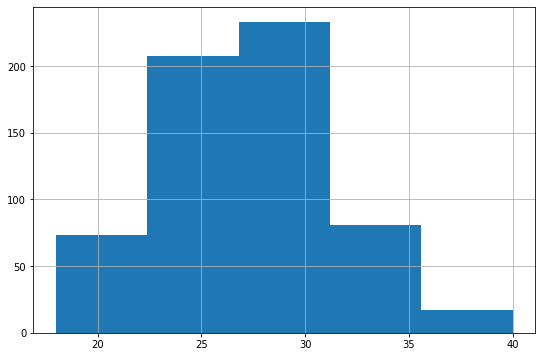

In [ ]:
df_players_clean['Age'].hist(bins = 5)

<AxesSubplot:>

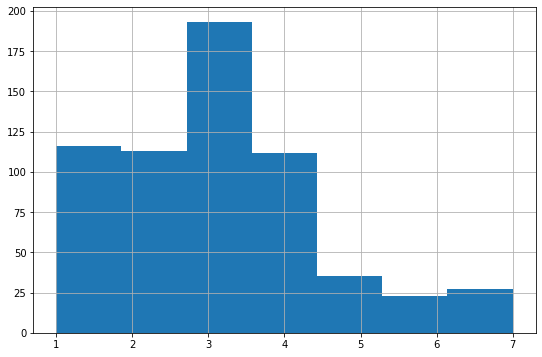

In [ ]:
df_players_clean['Appearances'].hist(bins = 7)

<AxesSubplot:>

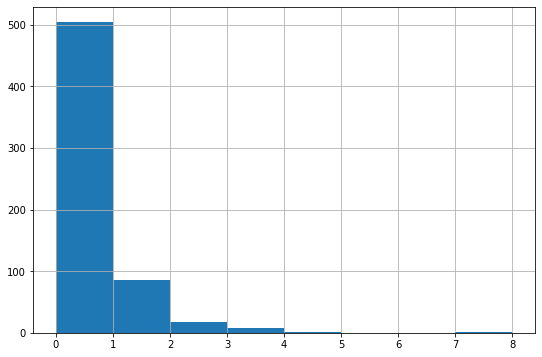

In [ ]:
df_players_clean['Goals Scored'].hist(bins = 8)

<AxesSubplot:>

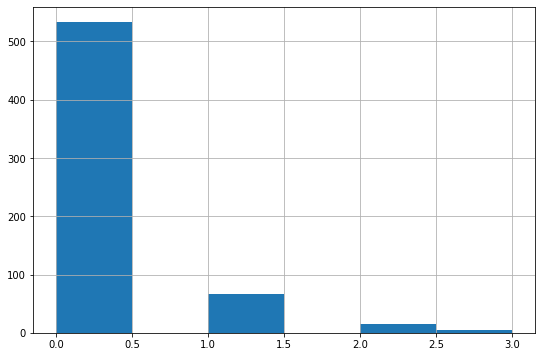

In [ ]:
df_players_clean['Assists Provided'].hist(bins = 6)

<AxesSubplot:>

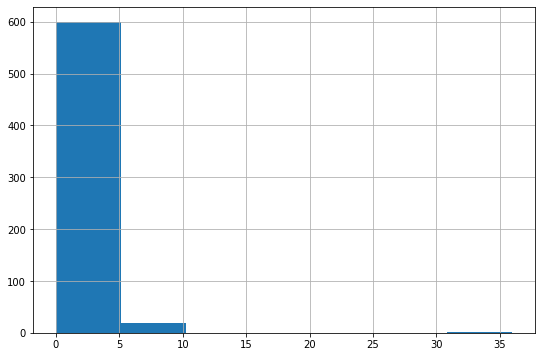

In [ ]:
df_players_clean['Dribbles per 90'].hist(bins = 7)

In [ ]:
df_players_clean.loc[df_players_clean['Dribbles per 90'] > 15]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
650,Costa Rica,32,MF,17,30.0,Herediano,Yeltsin Tejeda,3,1.0,1.0,33.0,0.33,1.33,4.66
758,Ghana,58,FW,19,28.0,Athletic Club,Inaki Williams,3,0.0,1.0,36.0,0.00,1.07,3.57


<AxesSubplot:>

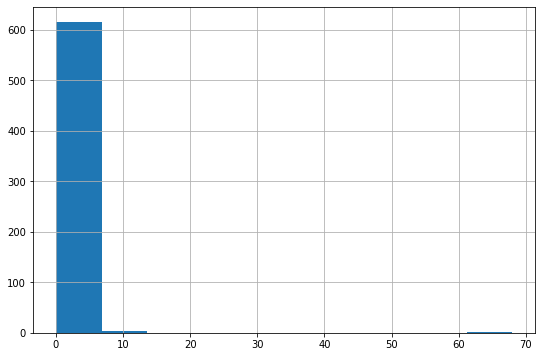

In [ ]:
df_players_clean['Interceptions per 90'].hist()

In [33]:
df_players_clean.loc[df_players_clean['Interceptions per 90'] > 20]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90
634,Germany,14,FW,10,27.0,Bayern Munich,Serge Gnabry,3,1.0,1.0,1.7,68.0,1.7,3.4


In [34]:
# Параметр 'Interceptions per 90' говорит о кол-во перехватов, приходящихся 
# на 90 минут игры. Здравый смысл говорит о том, что значение данного параметра
# "68" является ошибочным. Заменим его на среднее значение по столбцу.

df_players_clean.loc[df_players_clean['Interceptions per 90'] > 20, 'Interceptions per 90'] = df_players_clean['Interceptions per 90'].mean()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

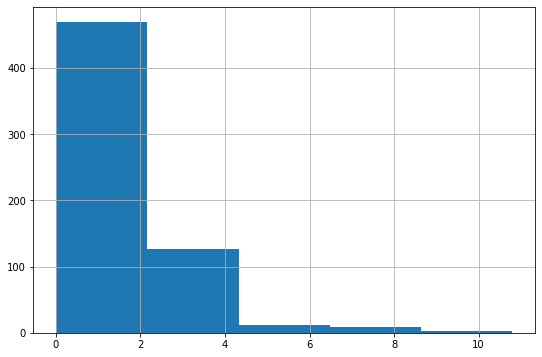

In [ ]:
df_players_clean['Tackles per 90'].hist(bins = 5)

<AxesSubplot:>

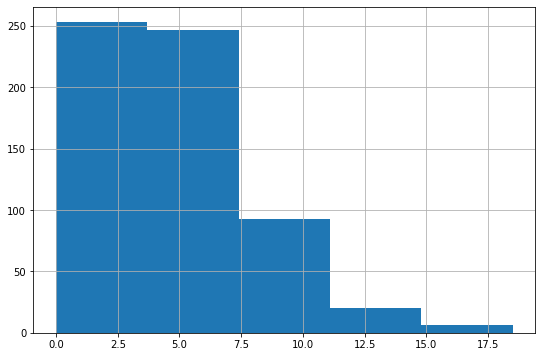

In [ ]:
df_players_clean['Total Duels Won per 90'].hist(bins = 5)

Добавим еще данные

In [35]:
df_other_stats = pd.read_excel('Soccer-Stats-FIFA-World-Cup-2022.xlsx')

In [36]:
df_other_stats.head()

,Name,Team,Jersey,Total PlayTime (min),FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced
0,Lionel Messi,Argentina,10,846,9,17,31,0,1,7,NaN,0
1,Emiliano Martínez,Argentina,23,846,0,0,0,0,1,7,7.0,29
2,Nicolás Otamendi,Argentina,19,846,13,0,1,0,2,7,NaN,0
3,Josko Gvardiol,Croatia,20,845,8,1,2,0,0,7,NaN,0
4,Dominik Livakovic,Croatia,1,845,1,0,0,0,1,7,25.0,72


In [37]:
df_other_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  659 non-null    object 
 1   Team                  659 non-null    object 
 2   Jersey                659 non-null    int64  
 3   Total PlayTime (min)  659 non-null    int64  
 4   FoulsCommitted        659 non-null    int64  
 5   ShotsOnTarget         659 non-null    int64  
 6   TotalShots            659 non-null    int64  
 7   RedCards              659 non-null    int64  
 8   YellowCards           659 non-null    int64  
 9   GoalsConceded         659 non-null    int64  
 10  Saves                 39 non-null     float64
 11  ShotsFaced            659 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 61.9+ KB


In [38]:
# Заменим NaN значения (имеются только в столбце Saves) на 0.
# Saves - параметр для вратарей. NaN значения в этом столбце 
# означают, что данная строка "не вратарь" - заменяем на 0, т.к. 
# не будет влиять на вычисления
df_other_stats.fillna(0, inplace = True)

In [39]:
df_other_stats.describe()

,Jersey,Total PlayTime (min),FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,13.078907,250.837633,2.280728,0.682853,2.106222,0.004552,0.327769,2.784522,0.490137,1.783005
std,7.329200,175.225801,2.554888,1.404896,3.115449,0.067369,0.552972,2.404846,2.403356,8.315398
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,113.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,13.000000,218.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,19.000000,360.000000,3.000000,1.000000,3.000000,0.000000,1.000000,4.000000,0.000000,0.000000
max,26.000000,846.000000,17.000000,17.000000,31.000000,1.000000,3.000000,11.000000,25.000000,72.000000


In [40]:
df_other_stats = df_other_stats.rename (columns= {'Jersey': 'National Team Jersey Number', 'Team': 'Nationality'})

In [41]:
df_total_stats = pd.merge(df_players_clean, df_other_stats, how = 'left', on = ['Nationality', 'National Team Jersey Number'])

In [42]:
df_total_stats.head()

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,Name,Total PlayTime (min),FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced
0,Argentina,2,GK,23,30.0,Aston Villa,Emiliano Martinez,7,0.0,0.0,...,Emiliano Martínez,846.0,0.0,0.0,0.0,0.0,1.0,7.0,7.0,29.0
1,Argentina,2,DF,19,35.0,Benfica,Nicolas Otamendi,7,0.0,1.0,...,Nicolás Otamendi,846.0,13.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0
2,Argentina,2,DF,8,31.0,Sevilla,Marcos Acuna,6,0.0,0.0,...,Marcos Acuña,439.0,9.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0
3,Argentina,2,DF,3,30.0,Lyon,Nicolas Tagliafico,6,0.0,0.0,...,Nicolás Tagliafico,464.0,7.0,1.0,3.0,0.0,0.0,7.0,0.0,0.0
4,Argentina,2,DF,6,31.0,Real Betis,German Pezzella,3,0.0,0.0,...,Germán Pezzella,93.0,2.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0


In [43]:
df_total_stats.drop(['Name'], axis = 1, inplace = True)
df_total_stats.head()

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,Total Duels Won per 90,Total PlayTime (min),FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced
0,Argentina,2,GK,23,30.0,Aston Villa,Emiliano Martinez,7,0.0,0.0,...,0.65,846.0,0.0,0.0,0.0,0.0,1.0,7.0,7.0,29.0
1,Argentina,2,DF,19,35.0,Benfica,Nicolas Otamendi,7,0.0,1.0,...,7.17,846.0,13.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0
2,Argentina,2,DF,8,31.0,Sevilla,Marcos Acuna,6,0.0,0.0,...,7.97,439.0,9.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0
3,Argentina,2,DF,3,30.0,Lyon,Nicolas Tagliafico,6,0.0,0.0,...,5.07,464.0,7.0,1.0,3.0,0.0,0.0,7.0,0.0,0.0
4,Argentina,2,DF,6,31.0,Real Betis,German Pezzella,3,0.0,0.0,...,3.16,93.0,2.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0


In [44]:
df_total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 618
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  619 non-null    object 
 1   FIFA Ranking                 619 non-null    int64  
 2   Position                     619 non-null    object 
 3   National Team Jersey Number  619 non-null    int64  
 4   Age                          612 non-null    float64
 5   Club                         619 non-null    object 
 6   Player Name                  619 non-null    object 
 7   Appearances                  619 non-null    int64  
 8   Goals Scored                 619 non-null    float64
 9   Assists Provided             619 non-null    float64
 10  Dribbles per 90              619 non-null    float64
 11  Interceptions per 90         619 non-null    float64
 12  Tackles per 90               619 non-null    float64
 13  Total Duels Won per 

In [45]:
df_total_stats[df_total_stats['Total PlayTime (min)'].isnull()]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,Total Duels Won per 90,Total PlayTime (min),FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced
37,France,3,MF,19,24.0,Monaco,Youssouf Fofana,6,0.0,0.0,...,5.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,USA,13,GK,1,28.0,Arsenal,Matt Turner,4,0.0,0.0,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,USA,13,DF,20,25.0,Celtic,Cameron Carter-Vickers,1,0.0,0.0,...,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,USA,13,DF,2,22.0,AC Milan,Sergiño Dest,4,0.0,1.0,...,2.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,USA,13,DF,18,26.0,Nashville SC,Shaq Moore,2,0.0,0.0,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,USA,13,DF,13,35.0,Fulham,Tim Ream,4,0.0,0.0,...,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,USA,13,DF,5,25.0,Fulham,Antonee Robinson,4,0.0,0.0,...,5.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,USA,13,DF,22,29.0,Inter Miami,DeAndre Yedlin,2,0.0,0.0,...,11.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,USA,13,DF,3,29.0,Nashville SC,Walker Zimmerman,4,0.0,0.0,...,6.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,USA,13,MF,11,22.0,Leeds United,Brenden Aaronson,4,0.0,0.0,...,6.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_total_stats.dropna(subset=['Total PlayTime (min)'], inplace = True)

Добавим вычисляемый столбец, показывающий общий рейтинг игрока. 
Поскольку для разных позиций игроков важны разные характеристики, подсчет будет производиться индивидуально для каждой позиции.

In [47]:
# Функция номализации данных

def NormalizeData(data):
  return (round(((data - np.min(data)) / (np.max(data) - np.min(data))), 2))

In [48]:
def weird_division(a, b):
  c = a / b
  c = c.fillna(0)
  return c

In [49]:
# Основной характеристикой для рейтинга форвардов будем считать количество забитых голов, 
# а дополнением нормализованную сумму остальных характеристик. 
# Полученные значения суммируем и делим на количество сыгранных матчей.

df_total_stats['Total player rank'] = np.where(df_total_stats['Position'] == 'FW', \
                NormalizeData(round((df_total_stats['Goals Scored'] + \
                NormalizeData(df_total_stats[['Assists Provided', 'Dribbles per 90',
                'Interceptions per 90', 'Tackles per 90', 
                'Total Duels Won per 90']].sum(axis = 1) + \
                weird_division(df_total_stats['ShotsOnTarget'],  df_total_stats['TotalShots']) - \
                df_total_stats['FoulsCommitted']))/df_total_stats['Appearances'], 3)), 0)

In [50]:
# Для защитиков суммируем характеристики, связанные с игрой в отборе мяча
# и отнимаем количество нарушений
# Полученные значения суммируем и делим на количество сыгранных матчей.
df_total_stats['Total player rank'] = np.where(df_total_stats['Position'] == 'DF', \
            NormalizeData(round(abs((df_total_stats['Assists Provided'] + df_total_stats['Dribbles per 90'] + \
            df_total_stats['Interceptions per 90'] + df_total_stats['Tackles per 90'] + \
            df_total_stats['Total Duels Won per 90'] - df_total_stats['FoulsCommitted'] + \
            NormalizeData(df_total_stats['Goals Scored'])) / df_total_stats['Appearances']), 3)), \
            df_total_stats['Total player rank'])

In [51]:
# Для полузащитников усредняем показатель нападающих и защитников
df_total_stats['Total player rank'] = np.where(df_total_stats['Position'] == 'MF', \
                NormalizeData((round((df_total_stats['Goals Scored'] + \
                NormalizeData(df_total_stats[['Assists Provided', 'Dribbles per 90',
                'Interceptions per 90', 'Tackles per 90', 
                'Total Duels Won per 90']].sum(axis = 1) + \
                weird_division(df_total_stats['ShotsOnTarget'],  df_total_stats['TotalShots']) - \
                df_total_stats['FoulsCommitted']))/df_total_stats['Appearances'], 3) + \
                round(abs((df_total_stats['Assists Provided'] + df_total_stats['Dribbles per 90'] + \
                df_total_stats['Interceptions per 90'] + df_total_stats['Tackles per 90'] + \
                df_total_stats['Total Duels Won per 90'] - df_total_stats['FoulsCommitted'] + \
                NormalizeData(df_total_stats['Goals Scored'])) / df_total_stats['Appearances']), 2)) / 2), \
                df_total_stats['Total player rank'])

In [52]:
# Для вратарей вычисляем отношение ударов по воротам к пропущенным мячам
# добавляя сейвы и выигранные единоборства
df_total_stats['Total player rank'] = np.where(df_total_stats['Position'] == 'GK', \
              NormalizeData(round(weird_division(df_total_stats['ShotsFaced'], (df_total_stats['GoalsConceded']+1)) + \
              df_total_stats['Saves'] + df_total_stats['Total Duels Won per 90'], 3)), \
               df_total_stats['Total player rank']) 

Добавим вычисляемый столбец, показывающий "забиваемость игока" игрока. 
Вычислим, как отношение общего игрового времени к забитым голам (гол в X минут)

In [53]:
df_total_stats['Goals per time'] = round((df_total_stats['Total PlayTime (min)'] / df_total_stats['Goals Scored']), 2)

In [54]:
from numpy.core.getlimits import inf
df_total_stats['Goals per time'] = np.where((df_total_stats['Goals per time'] == inf), 0, df_total_stats['Goals per time'])

In [55]:
df_total_stats.head()

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
0,Argentina,2,GK,23,30.0,Aston Villa,Emiliano Martinez,7,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7.0,7.0,29.0,0.33,0.0
1,Argentina,2,DF,19,35.0,Benfica,Nicolas Otamendi,7,0.0,1.0,...,13.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0,0.01,0.0
2,Argentina,2,DF,8,31.0,Sevilla,Marcos Acuna,6,0.0,0.0,...,9.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,0.03,0.0
3,Argentina,2,DF,3,30.0,Lyon,Nicolas Tagliafico,6,0.0,0.0,...,7.0,1.0,3.0,0.0,0.0,7.0,0.0,0.0,0.02,0.0
4,Argentina,2,DF,6,31.0,Real Betis,German Pezzella,3,0.0,0.0,...,2.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.02,0.0


In [ ]:
df_total_stats.describe()

,FIFA Ranking,National Team Jersey Number,Age,Appearances,Goals Scored,Assists Provided,Dribbles per 90,Interceptions per 90,Tackles per 90,Total Duels Won per 90,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
count,578.000000,578.000000,573.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,19.738754,13.064014,27.383944,3.044983,0.273356,0.183391,1.116851,0.738276,1.372024,4.601315,...,2.385813,0.719723,2.211073,0.005190,0.328720,2.892734,0.512111,1.818339,0.177872,54.336419
std,15.671650,7.267199,4.141199,1.560357,0.736296,0.500538,2.441960,1.174689,1.543747,3.506366,...,2.625354,1.452062,3.217761,0.071919,0.551574,2.432218,2.502136,8.584368,0.177638,136.316548
min,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.060000,0.000000
50%,16.000000,13.000000,27.000000,3.000000,0.000000,0.000000,0.500000,0.420000,1.015000,4.500000,...,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.120000,0.000000
75%,27.750000,19.000000,30.000000,4.000000,0.000000,0.000000,1.447500,1.047500,2.060000,6.767500,...,3.000000,1.000000,3.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.230000,0.000000
max,60.000000,26.000000,40.000000,7.000000,8.000000,3.000000,36.000000,12.860000,10.800000,18.490000,...,17.000000,17.000000,31.000000,1.000000,3.000000,11.000000,25.000000,72.000000,1.000000,845.000000


In [ ]:
df_total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 618
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nationality                  578 non-null    object 
 1   FIFA Ranking                 578 non-null    int64  
 2   Position                     578 non-null    object 
 3   National Team Jersey Number  578 non-null    int64  
 4   Age                          573 non-null    float64
 5   Club                         578 non-null    object 
 6   Player Name                  578 non-null    object 
 7   Appearances                  578 non-null    int64  
 8   Goals Scored                 578 non-null    float64
 9   Assists Provided             578 non-null    float64
 10  Dribbles per 90              578 non-null    float64
 11  Interceptions per 90         578 non-null    float64
 12  Tackles per 90               578 non-null    float64
 13  Total Duels Won per 

In [ ]:
# Запишем датафрейм в CSV файл
df_total_stats.to_csv('df_total_stats.csv', index = False)

<AxesSubplot:>

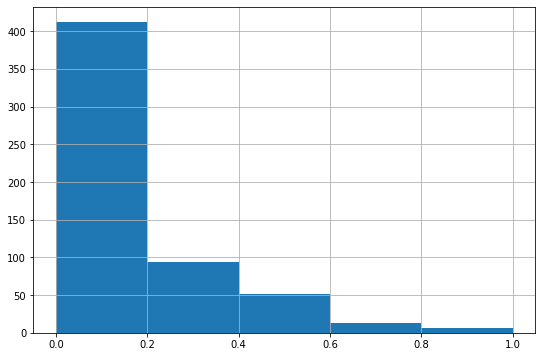

In [ ]:
# Гистограмма распределения ранга игроков
df_total_stats['Total player rank'].hist(bins = 5)

Выявление топовых игроков

In [ ]:
top_players = df_total_stats.sort_values(by = 'Total player rank', ascending = False).head(10)
top_players

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
48,Croatia,7,GK,1,28.0,Dinamo Zagreb,Dominik Livakovic,7,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,7.0,25.0,72.0,1.00,0.00
167,Portugal,9,DF,19,20.0,PSG,Nuno Mendes,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00
224,Poland,22,GK,1,32.0,Juventus,Wojciech Szczesny,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,21.0,58.0,0.90,0.00
94,Netherlands,6,GK,23,28.0,Heerenveen,Andries Noppert,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,18.0,59.0,0.87,0.00
163,Portugal,9,DF,13,31.0,PSG,Danilo Pereira,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.84,0.00
42,France,3,FW,10,24.0,PSG,Kylian Mbappe,7,8.0,2.0,...,7.0,12.0,30.0,0.0,0.0,7.0,0.0,0.0,0.82,97.75
414,Mexico,15,MF,18,36.0,Real Betis,Andres Guardado,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,0.00
357,Ecuador,41,FW,13,33.0,Fenerbahce,Enner Valencia,3,3.0,0.0,...,3.0,4.0,8.0,0.0,0.0,3.0,0.0,0.0,0.77,95.67
262,Japan,20,GK,12,33.0,Shimizu S-Pulse,Shuichi Gonda,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,15.0,52.0,0.74,0.00
571,Ghana,58,DF,3,34.0,Club Brugge,Denis Odoi,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.00


In [ ]:
top_players.to_csv('top_players.csv', index = False)

In [ ]:
df_total_stats['Position'].unique()

array(['GK', 'DF', 'MF', 'FW'], dtype=object)

In [ ]:
# Топ 10 защитников с самым высоким общим рейтингом
top_DF = df_total_stats.loc[df_total_stats['Position'] == 'DF'] \
.sort_values(by = 'Total player rank', ascending = False).head(10)

top_DF.to_csv('top_DF.csv', index = False)

In [ ]:
top_DF

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
167,Portugal,9,DF,19,20.0,PSG,Nuno Mendes,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0
163,Portugal,9,DF,13,31.0,PSG,Danilo Pereira,1,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.84,0.0
571,Ghana,58,DF,3,34.0,Club Brugge,Denis Odoi,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.0
448,Denmark,18,DF,4,33.0,AC Milan,Simon Kjaer,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.71,0.0
485,Germany,14,DF,5,26.0,West Ham,Thilo Kehrer,1,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.70,0.0
32,France,3,DF,21,27.0,Bayern Munich,Lucas Hernandez,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65,0.0
578,Ghana,58,DF,14,24.0,Auxerre,Gideon Mensah,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.57,0.0
454,Denmark,18,DF,3,24.0,Galatasaray,Victor Nelsson,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.56,0.0
191,Australia,27,DF,3,23.0,Hearts,Nathaniel Atkinson,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.54,0.0
188,Australia,27,DF,8,30.0,Sunderland,Bailey Wright,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.52,0.0


<ipython-input-74-03e73734746e>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'x')


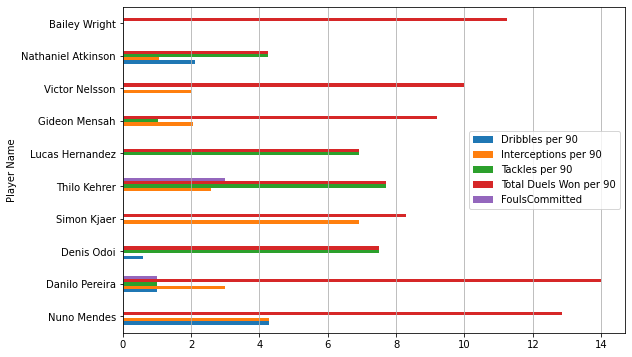

In [ ]:
top_DF.plot(x='Player Name', y=['Dribbles per 90', 'Interceptions per 90', 'Tackles per 90', \
                                'Total Duels Won per 90', 'FoulsCommitted'], kind='barh')
plt.grid(b=True, axis = 'x')

In [ ]:
# Топ 10 полузащитников с самым высоким общим рейтингом
top_MF = df_total_stats.loc[(df_total_stats['Appearances'] > 2) \
                            & (df_total_stats['Position'] == 'MF')] \
.sort_values(by = 'Total player rank', ascending = False).head(10)
top_MF

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
507,Costa Rica,32,MF,17,30.0,Herediano,Yeltsin Tejeda,3,1.0,1.0,...,0.0,2.0,2.0,0.0,0.0,11.0,0.0,0.0,0.64,333.0
494,Germany,14,MF,14,19.0,Bayern Munich,Jamal Musiala,3,0.0,1.0,...,1.0,3.0,12.0,0.0,0.0,4.0,0.0,0.0,0.31,0.0
129,England,5,MF,7,27.0,Manchester City,Jack Grealish,5,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.28,222.0
595,Uruguay,16,MF,6,25.0,Tottenham Hotspur,Rodrigo Bentancur,3,0.0,0.0,...,5.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,0.24,0.0
170,Portugal,9,MF,6,27.0,Fulham,Joao Palhinha,3,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.21,0.0
582,Ghana,58,MF,20,22.0,Ajax,Mohammed Kudus,3,2.0,0.0,...,3.0,3.0,8.0,0.0,1.0,5.0,0.0,0.0,0.19,129.0
252,Senegal,19,MF,26,24.0,Marseille,Papa Gueye,3,0.0,0.0,...,3.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,0.18,0.0
13,Argentina,2,MF,14,24.0,Bayer Leverkusen,Exequiel Palacios,3,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.18,0.0
523,Belgium,4,MF,8,25.0,Leicester City,Youri Tielemans,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.18,0.0
608,Canada,53,MF,13,40.0,Besiktas,Atiba Hutchinson,3,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.17,0.0


<ipython-input-76-c3676dda5c0f>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'x')


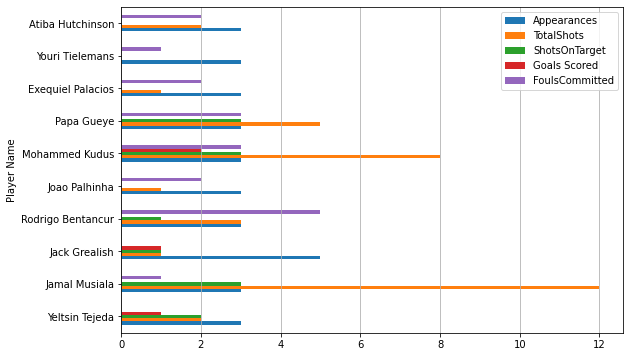

In [ ]:
top_MF.plot(x='Player Name', y=['Appearances', 'TotalShots', 'ShotsOnTarget', 'Goals Scored', 'FoulsCommitted'], kind='barh')
plt.grid(b=True, axis = 'x')

In [ ]:
top_MF.to_csv('top_MF.csv', index = False)

In [ ]:
# Топ 10 нападающих с самым высоким общим рейтингом
top_FW = df_total_stats.loc[df_total_stats['Position'] == 'FW'] \
.sort_values(by = 'Total player rank', ascending = False).head(10)

top_FW

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
42,France,3,FW,10,24.0,PSG,Kylian Mbappe,7,8.0,2.0,...,7.0,12.0,30.0,0.0,0.0,7.0,0.0,0.0,0.82,97.75
357,Ecuador,41,FW,13,33.0,Fenerbahce,Enner Valencia,3,3.0,0.0,...,3.0,4.0,8.0,0.0,0.0,3.0,0.0,0.0,0.77,95.67
17,Argentina,2,FW,10,35.0,PSG,Lionel Messi 🐐,7,7.0,3.0,...,9.0,17.0,31.0,0.0,1.0,7.0,0.0,0.0,0.72,120.86
499,Germany,14,FW,9,30.0,Werder Bremen,Niclas Fullkrug,3,2.0,1.0,...,0.0,3.0,8.0,0.0,0.0,3.0,0.0,0.0,0.58,78.00
181,Portugal,9,FW,26,21.0,Benfica,Goncalo Ramos,4,3.0,1.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,0.0,0.58,71.00
132,England,5,FW,17,21.0,Arsenal,Bukayo Saka,4,3.0,0.0,...,7.0,5.0,7.0,0.0,0.0,3.0,0.0,0.0,0.57,97.67
317,Spain,10,FW,7,30.0,Atletico Madrid,Alvaro Morata,4,3.0,1.0,...,1.0,5.0,8.0,0.0,0.0,3.0,0.0,0.0,0.57,82.33
154,Brazil,1,FW,9,25.0,Tottenham,Richarlison,4,3.0,0.0,...,5.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,0.56,118.67
152,Brazil,1,FW,10,31.0,PSG,Neymar,3,2.0,1.0,...,4.0,5.0,12.0,0.0,0.0,2.0,0.0,0.0,0.56,142.00
388,Iran,24,FW,9,30.0,Porto,Mehdi Taremi,3,2.0,1.0,...,4.0,2.0,5.0,0.0,0.0,7.0,0.0,0.0,0.55,180.00


<ipython-input-79-4128e66d24e4>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'x')
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128016 (\N{GOAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


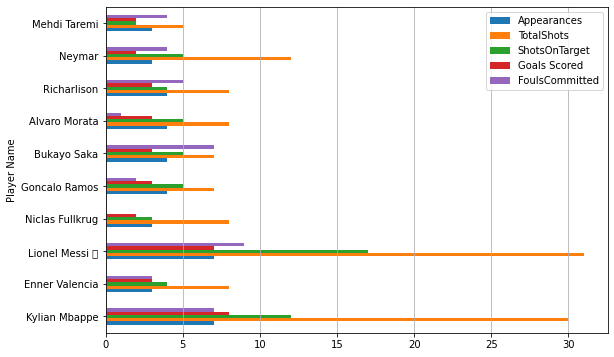

In [ ]:
top_FW.plot(x='Player Name', y=['Appearances', 'TotalShots', 'ShotsOnTarget', 'Goals Scored', 'FoulsCommitted'], kind='barh')
plt.grid(b=True, axis = 'x')

In [ ]:
top_FW.to_csv('top_FW.csv', index = False)

In [ ]:
# Топ 10 вратарей с самым высоким общим рейтингом
top_GK = df_total_stats.loc[df_total_stats['Position'] == 'GK'] \
.sort_values(by = 'Total player rank', ascending = False).head(10)

top_GK

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
48,Croatia,7,GK,1,28.0,Dinamo Zagreb,Dominik Livakovic,7,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,7.0,25.0,72.0,1.00,0.0
224,Poland,22,GK,1,32.0,Juventus,Wojciech Szczesny,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,21.0,58.0,0.90,0.0
94,Netherlands,6,GK,23,28.0,Heerenveen,Andries Noppert,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,18.0,59.0,0.87,0.0
262,Japan,20,GK,12,33.0,Shimizu S-Pulse,Shuichi Gonda,4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,15.0,52.0,0.74,0.0
24,France,3,GK,1,36.0,Tottenham,Hugo Lloris,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,17.0,49.0,0.71,0.0
428,Saudi Arabia,49,GK,21,31.0,Al-Hilal,Mohammed Al-Owais,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,15.0,44.0,0.65,0.0
515,Belgium,4,GK,1,30.0,Real Madrid,Thibaut Courtois,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,8.0,40.0,0.62,0.0
550,Serbia,29,GK,23,26.0,Torino,Vanja Milinkovic-Savic,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,16.0,40.0,0.60,0.0
185,Australia,27,GK,1,30.0,Copenhagen,Mat Ryan,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,12.0,55.0,0.58,0.0
69,Morocco,11,GK,1,31.0,Sevilla,Yassine Bounou,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,7.0,56.0,0.55,0.0


<ipython-input-82-6f7a743b0c3c>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'x')


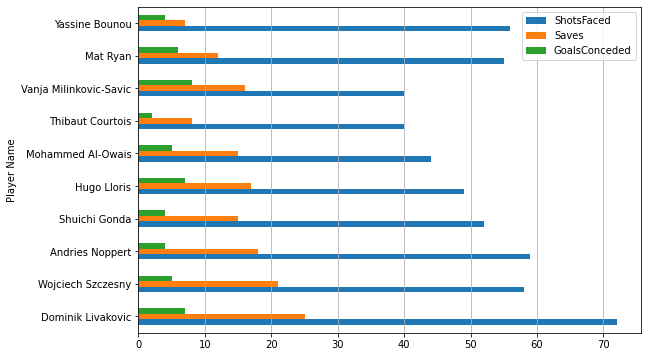

In [ ]:
top_GK.plot(x='Player Name', y=['ShotsFaced', 'Saves', 'GoalsConceded'], kind='barh')
plt.grid(b=True, axis = 'x')

In [56]:
# Самые результативные по рейтингу игроков клубы
top_club_on_rating = df_total_stats[['Club', 'Total player rank']].groupby('Club')\
                .mean().sort_values(by = 'Total player rank', ascending = False)\
                .head(10).reset_index().round(3)

top_club_on_rating

,Club,Total player rank
0,Heerenveen,0.870
1,Shimizu S-Pulse,0.740
2,Fenerbahce,0.610
3,Auxerre,0.570
4,Alanyaspor,0.500
5,Wolverhampton Wanderers,0.500
6,Montpellier,0.480
7,Al Shabab,0.440
8,Lech Poznan,0.440
9,PSG,0.437


<ipython-input-57-3e02cc57d822>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'y')


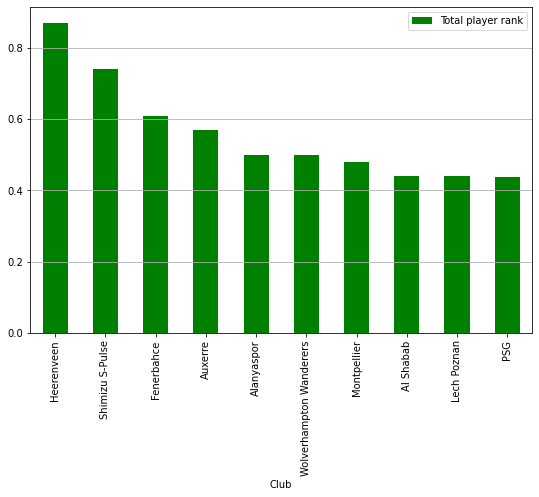

In [57]:
top_club_on_rating.plot(x='Club', y='Total player rank', kind='bar', color = 'green')
plt.grid(b=True, axis = 'y')

In [ ]:
top_club_on_rating.to_csv('top_club_on_rating.csv', index = False)

In [58]:
# Самые 'забивающие' по рейтингу игроков клубы
top_club_on_goals = df_total_stats[['Club', 'Nationality', 'Goals Scored']].groupby('Club')\
                .sum().sort_values(by = 'Goals Scored', ascending = False)\
                .head(10).reset_index()

top_club_on_goals

,Club,Goals Scored
0,PSG,18.0
1,Manchester City,8.0
2,Barcelona,8.0
3,AC Milan,7.0
4,Manchester United,6.0
5,Tottenham,6.0
6,Chelsea,5.0
7,Atletico Madrid,5.0
8,Benfica,4.0
9,Fenerbahce,4.0


<ipython-input-59-f585993fe480>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'y')


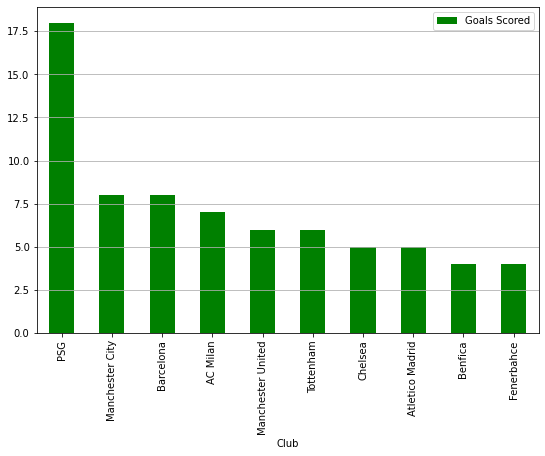

In [59]:
top_club_on_goals.plot(x='Club', y='Goals Scored', kind='bar', color = 'green')
plt.grid(b=True, axis = 'y')

In [ ]:
top_club_on_goals.to_csv('top_club_on_goals.csv', index = False)

In [ ]:
count_ycards_club = df_total_stats[['Club', 'YellowCards']].groupby('Club')\
                .sum().sort_values(by = 'YellowCards', ascending = False)\
                .head(10).reset_index()

count_ycards_club

,Club,YellowCards
0,Sevilla,8.0
1,Al-Hilal,7.0
2,Ajax,6.0
3,Barcelona,6.0
4,Juventus,5.0
5,Manchester United,5.0
6,PSG,4.0
7,Atletico Madrid,4.0
8,Al-Nassr,4.0
9,Bayern Munich,4.0


In [ ]:
count_ycards_club.to_csv('count_ycards_club.csv', index = False)

<ipython-input-88-63c73bcf1962>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'y')


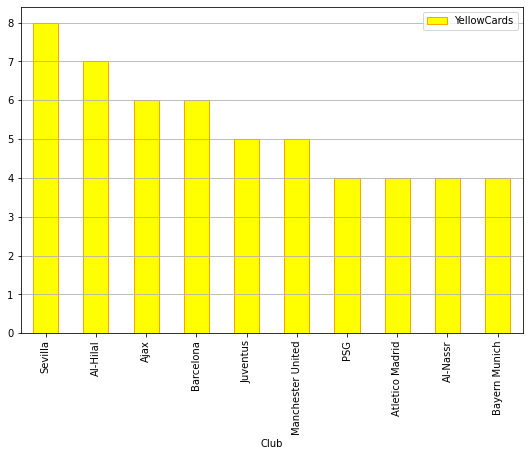

In [ ]:
count_ycards_club.plot(x='Club', y='YellowCards', kind='bar', color = 'yellow', \
                       ec = 'orange')
plt.grid(b=True, axis = 'y')

In [ ]:
count_cards_country = df_total_stats[['Nationality', 'YellowCards']].groupby('Nationality')\
                .sum().sort_values(by = 'YellowCards', ascending = False)\
                .head(10).reset_index()

count_cards_country

,Nationality,YellowCards
0,Argentina,17.0
1,Saudi Arabia,13.0
2,Serbia,12.0
3,Netherlands,11.0
4,Switzerland,8.0
5,Croatia,8.0
6,Morocco,8.0
7,France,8.0
8,Iran,7.0
9,Uruguay,7.0


In [ ]:
count_cards_country.to_csv('count_cards_country.csv', index = False)

<ipython-input-90-1b33ece74333>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'y')


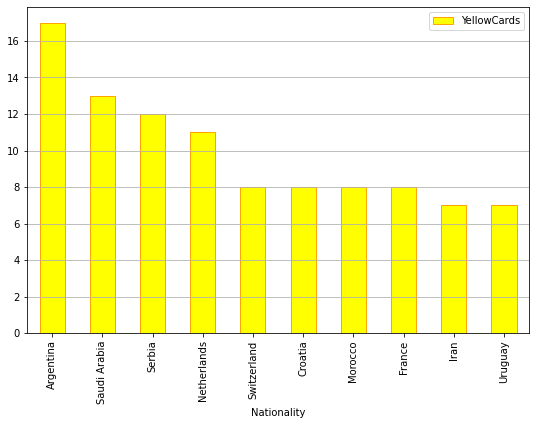

In [ ]:
count_cards_country.plot(x='Nationality', y='YellowCards', kind='bar', color = 'yellow', \
                          ec = 'orange')
plt.grid(b=True, axis = 'y')

In [ ]:
df_total_stats[df_total_stats['RedCards'] > 0]

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
92,Morocco,11,FW,21,25.0,Bari,Walid Cheddira,2,0.0,0.0,...,4.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.13,0.0
98,Netherlands,6,DF,22,26.0,Inter,Denzel Dumfries,5,1.0,2.0,...,17.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.04,600.0
390,Wales,28,GK,1,36.0,Nottingham Forest,Wayne Hennessey,2,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,3.0,5.0,23.0,0.31,0.0


In [ ]:
# Топ 10 молодых игроков с самым высоким общим рейтингом
top_young = df_total_stats.loc[df_total_stats['Age'] < 20] \
.sort_values(by = 'Total player rank', ascending = False).head(10)

top_young

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
106,Netherlands,6,MF,25,19.0,PSV,Xavi Simons,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0
494,Germany,14,MF,14,19.0,Bayern Munich,Jamal Musiala,3,0.0,1.0,...,1.0,3.0,12.0,0.0,0.0,4.0,0.0,0.0,0.31,0.0
500,Germany,14,FW,26,18.0,Borussia Dortmund,Youssoufa Moukoko,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0
123,England,5,MF,22,19.0,Borussia Dortmund,Jude Bellingham,5,1.0,1.0,...,5.0,2.0,4.0,0.0,0.0,4.0,0.0,0.0,0.12,505.0
509,Costa Rica,32,MF,9,18.0,Sunderland,Jewison Bennette,3,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.10,0.0
204,Australia,27,FW,21,18.0,Central Coast Mariners,Garang Kuol,2,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0
307,Spain,10,DF,14,19.0,Barcelona,Alejandro Balde,4,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.09,0.0
83,Morocco,11,MF,23,18.0,Genk,Bilal El Khannous,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.08,0.0
315,Spain,10,MF,9,18.0,Barcelona,Gavi,4,1.0,0.0,...,9.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.05,317.0
511,Costa Rica,32,MF,20,19.0,Nottingham Forest,Brandon Aguilera,3,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.03,0.0


<ipython-input-92-0575e0d4582a>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'x')


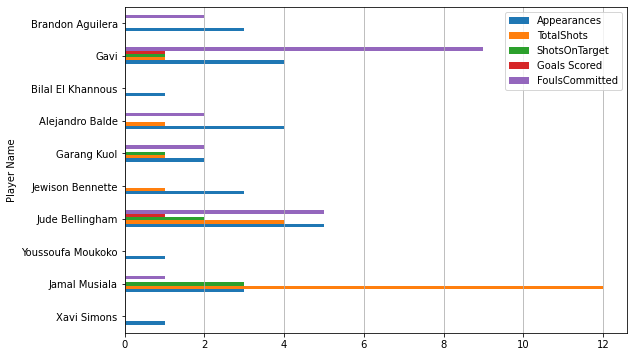

In [ ]:
top_young.plot(x='Player Name', y=['Appearances', 'TotalShots', 'ShotsOnTarget', 'Goals Scored', 'FoulsCommitted'], kind='barh')
plt.grid(b=True, axis = 'x')

In [ ]:
top_young.to_csv('top_young.csv', index = False)

In [ ]:
# Топ 10 самых часто забивающих игроков с учетом более 3 сыгранных матчей
top_periodicity_goals_players = \
df_total_stats.loc[(df_total_stats['Goals per time'] != 0) & (df_total_stats['Appearances'] > 3)] \
.sort_values(by = 'Goals per time').head(10)

top_periodicity_goals_players

,Nationality,FIFA Ranking,Position,National Team Jersey Number,Age,Club,Player Name,Appearances,Goals Scored,Assists Provided,...,FoulsCommitted,ShotsOnTarget,TotalShots,RedCards,YellowCards,GoalsConceded,Saves,ShotsFaced,Total player rank,Goals per time
181,Portugal,9,FW,26,21.0,Benfica,Goncalo Ramos,4,3.0,1.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,0.0,0.58,71.00
112,Netherlands,6,FW,19,30.0,Besiktas,Wout Weghorst,4,2.0,0.0,...,5.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.39,73.50
317,Spain,10,FW,7,30.0,Atletico Madrid,Alvaro Morata,4,3.0,1.0,...,1.0,5.0,8.0,0.0,0.0,3.0,0.0,0.0,0.57,82.33
131,England,5,FW,11,25.0,Manchester United,Marcus Rashford,5,3.0,0.0,...,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,0.47,85.67
132,England,5,FW,17,21.0,Arsenal,Bukayo Saka,4,3.0,0.0,...,7.0,5.0,7.0,0.0,0.0,3.0,0.0,0.0,0.57,97.67
42,France,3,FW,10,24.0,PSG,Kylian Mbappe,7,8.0,2.0,...,7.0,12.0,30.0,0.0,0.0,7.0,0.0,0.0,0.82,97.75
43,France,3,FW,9,NaN,AC Milan,Olivier Giroud,6,4.0,0.0,...,2.0,6.0,16.0,0.0,1.0,4.0,0.0,0.0,0.50,113.25
183,Portugal,9,FW,15,23.0,AC Milan,Rafael Leao,5,2.0,0.0,...,3.0,2.0,5.0,0.0,0.0,2.0,0.0,0.0,0.34,116.50
154,Brazil,1,FW,9,25.0,Tottenham,Richarlison,4,3.0,0.0,...,5.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,0.56,118.67
17,Argentina,2,FW,10,35.0,PSG,Lionel Messi 🐐,7,7.0,3.0,...,9.0,17.0,31.0,0.0,1.0,7.0,0.0,0.0,0.72,120.86


In [ ]:
top_periodicity_goals_players.to_csv('top_periodicity_goals_players.csv', index = False)